<a href="https://colab.research.google.com/github/ssoham10/Mario-meets-AI/blob/main/Mario_meets_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
df = pd.read_csv('mario.csv')

In [ ]:
df.head(50)

,team_id,phase,group,round,totalingred
0,21301,1,newhire,1,19
1,21301,1,newhire,2,23
2,21301,1,newhire,3,23
3,21301,1,newhire,4,25
4,21301,1,newhire,5,24
5,21301,1,newhire,6,27
6,21301,2,newhire,7,28
7,21301,2,newhire,8,28
8,21301,2,newhire,9,31
9,21301,2,newhire,10,28


In [ ]:
df.describe()

,team_id,phase,round,totalingred
count,660.000000,660.000000,660.000000,660.000000
mean,86159.927273,1.500000,6.500000,24.815152
std,38525.334870,0.500379,3.454671,4.389850
min,21301.000000,1.000000,1.000000,9.000000
25%,30505.000000,1.000000,3.750000,22.000000
50%,110511.000000,1.500000,6.500000,25.000000
75%,112203.000000,2.000000,9.250000,28.000000
max,120901.000000,2.000000,12.000000,36.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team_id      660 non-null    int64 
 1   phase        660 non-null    int64 
 2   group        660 non-null    object
 3   round        660 non-null    int64 
 4   totalingred  660 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 25.9+ KB


In [ ]:
print(df['team_id'].unique())
len(df['team_id'].unique())

[ 21301  21312  21410  21411  21412  22010  22011  22012  22412  22512
  22712  22811  30503  30505  31103 101602 101603 102401 102410 102411
 102412 102901 102910 103110 103111 103112 110510 110511 110801 110811
 110812 111401 111501 111512 111901 111911 111912 112102 112103 112104
 112105 112203 112205 112501 112503 112504 112505 112510 112511 112601
 112602 112610 112611 112612 120901]


55

So there are 55 teams in our dataset.

In [ ]:
df['group'].value_counts()

ai         240
control    240
newhire    180
Name: group, dtype: int64

This means that after phase 1 there were 15 (180/12) teams that played with a new player i.e newhire,
20 played with ai
and 20 played with the same team i.e control.

In [ ]:
newhire_df = df[df['group'] == 'newhire']
newhire_df

,team_id,phase,group,round,totalingred
0,21301,1,newhire,1,19
1,21301,1,newhire,2,23
2,21301,1,newhire,3,23
3,21301,1,newhire,4,25
4,21301,1,newhire,5,24
...,...,...,...,...,...
175,31103,2,newhire,8,26
176,31103,2,newhire,9,23
177,31103,2,newhire,10,25
178,31103,2,newhire,11,28


In [ ]:
newhire_des = newhire_df.describe()

In [ ]:
newhire_df['totalingred'].median()

26.0

In [ ]:
ai_df = df[df['group'] == 'ai']
ai_df

,team_id,phase,group,round,totalingred
180,101602,1,ai,1,20
181,101602,1,ai,2,19
182,101602,1,ai,3,23
183,101602,1,ai,4,19
184,101602,1,ai,5,22
...,...,...,...,...,...
631,112611,2,ai,8,27
632,112611,2,ai,9,30
633,112611,2,ai,10,25
634,112611,2,ai,11,22


In [ ]:
ai_des = ai_df.describe()

In [ ]:
ai_df['totalingred'].median()

25.0

In [ ]:
control_df = df[df['group'] == 'control']
control_df

,team_id,phase,group,round,totalingred
252,102901,1,control,1,24
253,102901,1,control,2,27
254,102901,1,control,3,28
255,102901,1,control,4,31
256,102901,1,control,5,26
...,...,...,...,...,...
655,120901,2,control,8,26
656,120901,2,control,9,28
657,120901,2,control,10,34
658,120901,2,control,11,28


In [ ]:
control_des = control_df.describe()

In [ ]:
control_df['totalingred'].median()

25.0

In [ ]:
newhire_des['totalingred']

count    180.000000
mean      25.288889
std        4.545842
min       13.000000
25%       23.000000
50%       26.000000
75%       28.000000
max       36.000000
Name: totalingred, dtype: float64

In [ ]:
ai_des['totalingred']

count    240.000000
mean      24.679167
std        4.297657
min        9.000000
25%       22.000000
50%       25.000000
75%       28.000000
max       36.000000
Name: totalingred, dtype: float64

In [ ]:
control_des['totalingred']

count    240.000000
mean      24.595833
std        4.353518
min       11.000000
25%       22.000000
50%       25.000000
75%       27.000000
max       34.000000
Name: totalingred, dtype: float64

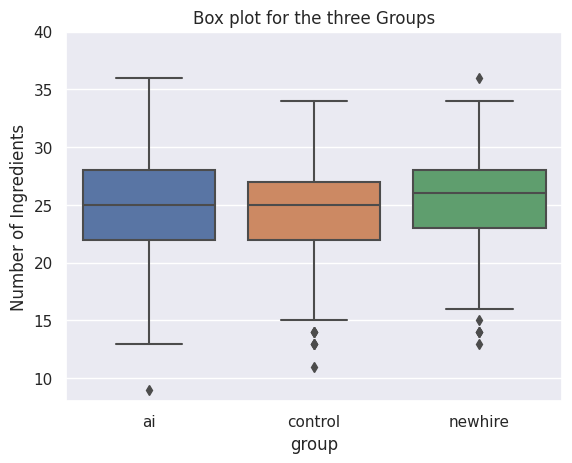

In [ ]:
ax = sns.boxplot(data=df, x="group", y="totalingred")
plt.ylim(8, 40)
plt.title("Box plot for the three Groups")
ax.set(ylabel='Number of Ingredients')
sns.set_theme(style='darkgrid')

Text(0.5, 1.0, "For 'AI'")

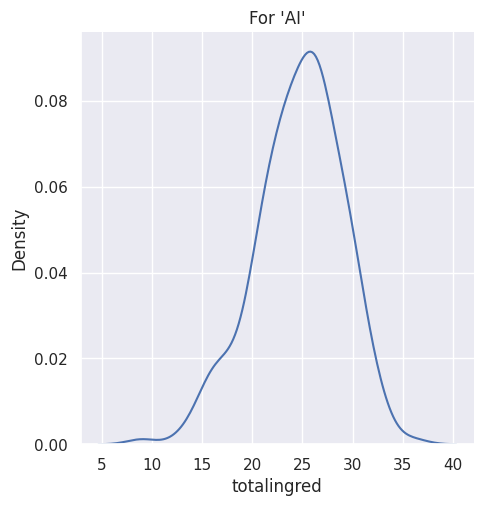

In [ ]:
sns.displot(ai_df['totalingred'], kind='kde')
plt.title("For 'AI'")

Text(0.5, 1.0, "For 'newhire'")

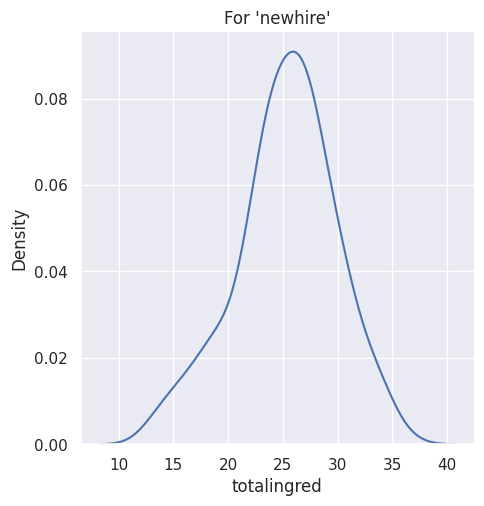

In [ ]:
sns.displot(newhire_df['totalingred'], kind='kde')
plt.title("For 'newhire'")

Text(0.5, 1.0, "For 'control'")

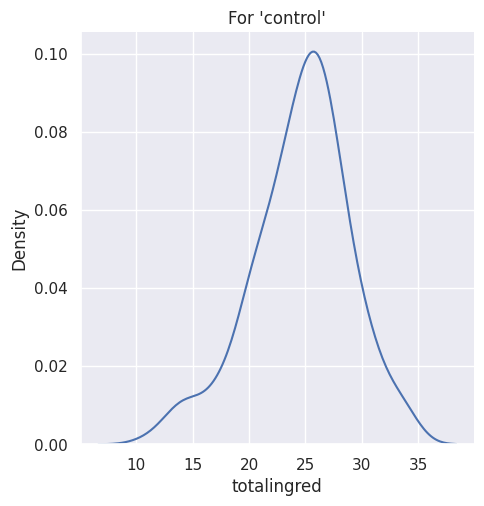

In [ ]:
sns.displot(control_df['totalingred'], kind='kde')
plt.title("For 'control'")

In [ ]:

stat, p = f_oneway(control_df['totalingred'], ai_df['totalingred'], newhire_df['totalingred'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=1.465, p=0.232
Probably the same distribution


Task 2

In [ ]:
phase2_df = df[df['phase'] == 2]
phase2_df

,team_id,phase,group,round,totalingred
6,21301,2,newhire,7,28
7,21301,2,newhire,8,28
8,21301,2,newhire,9,31
9,21301,2,newhire,10,28
10,21301,2,newhire,11,31
...,...,...,...,...,...
655,120901,2,control,8,26
656,120901,2,control,9,28
657,120901,2,control,10,34
658,120901,2,control,11,28


(8.0, 40.0)

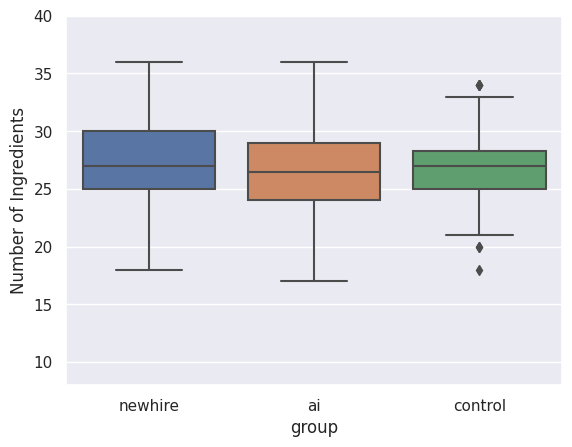

In [ ]:
ax = sns.boxplot(data=phase2_df, x="group", y="totalingred")
ax.set(ylabel='Number of Ingredients')
plt.ylim(8, 40)

In [ ]:
phase2_newhire_df = phase2_df[phase2_df['group'] == 'newhire']
phase2_newhire_df

,team_id,phase,group,round,totalingred
6,21301,2,newhire,7,28
7,21301,2,newhire,8,28
8,21301,2,newhire,9,31
9,21301,2,newhire,10,28
10,21301,2,newhire,11,31
...,...,...,...,...,...
175,31103,2,newhire,8,26
176,31103,2,newhire,9,23
177,31103,2,newhire,10,25
178,31103,2,newhire,11,28


In [ ]:
phase2_ai_df = phase2_df[phase2_df['group'] == 'ai']
phase2_ai_df

,team_id,phase,group,round,totalingred
186,101602,2,ai,7,27
187,101602,2,ai,8,29
188,101602,2,ai,9,27
189,101602,2,ai,10,27
190,101602,2,ai,11,30
...,...,...,...,...,...
631,112611,2,ai,8,27
632,112611,2,ai,9,30
633,112611,2,ai,10,25
634,112611,2,ai,11,22


In [ ]:
phase2_control_df = phase2_df[phase2_df['group'] == 'control']
phase2_control_df

,team_id,phase,group,round,totalingred
258,102901,2,control,7,34
259,102901,2,control,8,33
260,102901,2,control,9,33
261,102901,2,control,10,34
262,102901,2,control,11,33
...,...,...,...,...,...
655,120901,2,control,8,26
656,120901,2,control,9,28
657,120901,2,control,10,34
658,120901,2,control,11,28


In [ ]:
phase2_newhire_des = phase2_newhire_df.describe()
phase2_newhire_des['totalingred']

count    90.000000
mean     27.133333
std       3.892372
min      18.000000
25%      25.000000
50%      27.000000
75%      30.000000
max      36.000000
Name: totalingred, dtype: float64

In [ ]:
phase2_ai_des = phase2_ai_df.describe()
phase2_ai_des['totalingred']

count    120.000000
mean      26.233333
std        3.379954
min       17.000000
25%       24.000000
50%       26.500000
75%       29.000000
max       36.000000
Name: totalingred, dtype: float64

In [ ]:
phase2_control_des = phase2_control_df.describe()
phase2_control_des['totalingred']

count    120.000000
mean      26.750000
std        3.262339
min       18.000000
25%       25.000000
50%       27.000000
75%       28.250000
max       34.000000
Name: totalingred, dtype: float64

Creating phase 1 dataframe to compare the teams performance

In [ ]:
phase1_df = df[df['phase'] == 1]
phase1_df

,team_id,phase,group,round,totalingred
0,21301,1,newhire,1,19
1,21301,1,newhire,2,23
2,21301,1,newhire,3,23
3,21301,1,newhire,4,25
4,21301,1,newhire,5,24
...,...,...,...,...,...
649,120901,1,control,2,20
650,120901,1,control,3,26
651,120901,1,control,4,28
652,120901,1,control,5,27


In [ ]:
phase1_newhire_df = phase1_df[phase1_df['group'] == 'newhire']
phase1_newhire_df

,team_id,phase,group,round,totalingred
0,21301,1,newhire,1,19
1,21301,1,newhire,2,23
2,21301,1,newhire,3,23
3,21301,1,newhire,4,25
4,21301,1,newhire,5,24
...,...,...,...,...,...
169,31103,1,newhire,2,26
170,31103,1,newhire,3,28
171,31103,1,newhire,4,28
172,31103,1,newhire,5,29


In [ ]:
phase1_ai_df = phase1_df[phase1_df['group'] == 'ai']
phase1_ai_df

,team_id,phase,group,round,totalingred
180,101602,1,ai,1,20
181,101602,1,ai,2,19
182,101602,1,ai,3,23
183,101602,1,ai,4,19
184,101602,1,ai,5,22
...,...,...,...,...,...
625,112611,1,ai,2,18
626,112611,1,ai,3,26
627,112611,1,ai,4,29
628,112611,1,ai,5,25


In [ ]:
phase1_control_df = phase1_df[phase1_df['group'] == 'control']
phase1_control_df

,team_id,phase,group,round,totalingred
252,102901,1,control,1,24
253,102901,1,control,2,27
254,102901,1,control,3,28
255,102901,1,control,4,31
256,102901,1,control,5,26
...,...,...,...,...,...
649,120901,1,control,2,20
650,120901,1,control,3,26
651,120901,1,control,4,28
652,120901,1,control,5,27


In [ ]:
phase1_newhire_des = phase1_newhire_df.describe()
phase1_newhire_des['totalingred']

count    90.000000
mean     23.444444
std       4.419342
min      13.000000
25%      21.250000
50%      24.000000
75%      27.000000
max      33.000000
Name: totalingred, dtype: float64

In [ ]:
phase1_ai_des = phase1_ai_df.describe()
phase1_ai_des['totalingred']

count    120.000000
mean      23.125000
std        4.560633
min        9.000000
25%       21.000000
50%       23.000000
75%       26.000000
max       33.000000
Name: totalingred, dtype: float64

In [ ]:
phase1_control_des = phase1_control_df.describe()
phase1_control_des['totalingred']

count    120.000000
mean      22.441667
std        4.250152
min       11.000000
25%       20.000000
50%       23.000000
75%       25.000000
max       31.000000
Name: totalingred, dtype: float64

(8.0, 40.0)

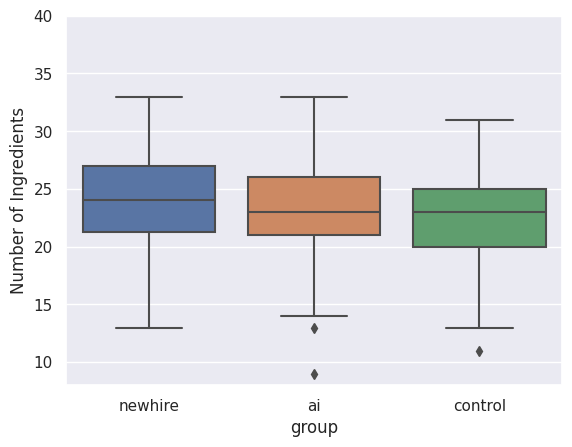

In [ ]:
ax = sns.boxplot(data=phase1_df, x="group", y="totalingred")
ax.set(ylabel='Number of Ingredients')
plt.ylim(8, 40)

ANOVA (one-way)

For each group, comparing phase 1 and phase 2 data.

In [ ]:
from scipy.stats import f_oneway
#data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
#data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(phase1_control_df['totalingred'], phase2_control_df['totalingred'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=77.592, p=0.000
Probably different distributions


In [ ]:
from scipy.stats import f_oneway
#data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
#data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(phase1_ai_df['totalingred'], phase2_ai_df['totalingred'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=35.980, p=0.000
Probably different distributions


In [ ]:
from scipy.stats import f_oneway
#data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
#data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(phase1_newhire_df['totalingred'], phase2_newhire_df['totalingred'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=35.313, p=0.000
Probably different distributions


Based on this comparison we can conclude that the performance of all the three groups when compared to phase 1 and 2 is different and for better.

In [ ]:
from scipy.stats import f_oneway
#data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
#data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(phase2_newhire_df['totalingred'], phase2_ai_df['totalingred'], phase2_control_df['totalingred'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=1.768, p=0.172
Probably the same distribution


Based on the above comparisons it seems like there is not much difference between the three groups in phase 2.

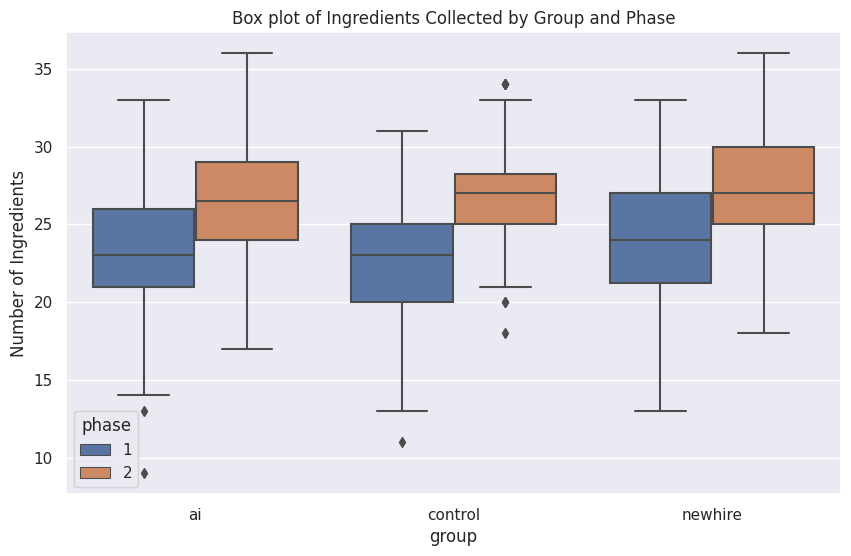

ANOVA p-value: 0.522859442701052
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
     ai control   0.5167 0.4853  -0.543 1.5763  False
     ai newhire      0.9 0.1548 -0.2446 2.0446  False
control newhire   0.3833 0.7103 -0.7612 1.5279  False
-----------------------------------------------------


In [ ]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the provided data
#df = pd.read_csv("your_data.csv")

# Convert 'group' to a categorical variable
df['group'] = pd.Categorical(df['group'])

# Descriptive statistics
desc_stats = df.groupby(['group', 'phase'])['totalingred'].describe()

# Boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='group', y='totalingred', hue='phase', data=df)
ax.set(ylabel='Number of Ingredients')
plt.title('Box plot of Ingredients Collected by Group and Phase')
plt.show()

# ANOVA
anova_result = f_oneway(df[(df['phase'] == 2) & (df['group'] != 'control')]['totalingred'],
                        df[(df['phase'] == 2) & (df['group'] == 'control')]['totalingred'],
                        df[(df['phase'] == 2) & (df['group'] == 'newhire')]['totalingred'])

# Post-hoc Tukey's HSD
tukey_results = pairwise_tukeyhsd(df[(df['phase'] == 2)]['totalingred'], df[(df['phase'] == 2)]['group'])

# Print results
print("ANOVA p-value:", anova_result.pvalue)
print(tukey_results)


ANOVA Result:

The ANOVA p-value is 0.5229, which is greater than the typical significance level of 0.05.
This suggests that there is no significant difference in the means of the groups in phase 2.

Tukey's HSD Result:

The Tukey HSD test is used for multiple pairwise comparisons after ANOVA.

The table shows the mean differences between groups, along with adjusted p-values.

The 'reject' column indicates whether the null hypothesis of equal means is rejected for each comparison.
In this case, all pairwise comparisons have p-values greater than 0.05.

None of the group comparisons (ai vs control, ai vs newhire, control vs newhire) have a significant difference in means.

Therefore, based on Tukey's HSD, we do not have evidence to reject the null hypothesis for any pair of groups.



Conclusion:

Based on both the ANOVA and Tukey's HSD results, there is no significant difference in the number of ingredients collected between the groups in phase 2. The p-values are greater than 0.05, and the confidence intervals for mean differences include zero. Therefore, we do not have sufficient evidence to reject the null hypothesis of equal means.

In [ ]:
# Calculate performance differences
df['performance_difference'] = df[df['phase'] == 2]['totalingred'] - df[df['phase'] == 1]['totalingred']

# ANOVA on performance differences
anova_result = f_oneway(df[df['group'] == 'control']['performance_difference'],
                        df[df['group'] == 'newhire']['performance_difference'],
                        df[df['group'] == 'ai']['performance_difference'])

# Post-hoc Tukey's HSD on performance differences
tukey_results = pairwise_tukeyhsd(df['performance_difference'], df['group'])

# Print results
print("ANOVA p-value for performance differences:", anova_result.pvalue)
print(tukey_results)

ANOVA p-value for performance differences: nan
Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1  group2 meandiff p-adj lower upper reject
-------------------------------------------------
     ai control      nan   nan   nan   nan  False
     ai newhire      nan   nan   nan   nan  False
control newhire      nan   nan   nan   nan  False
-------------------------------------------------


In [ ]:
# Check for missing values
print(df[['totalingred', 'group', 'phase']].isnull().sum())


totalingred    0
group          0
phase          0
dtype: int64


In [ ]:
import numpy as np

# Calculate performance differences using NumPy
df['performance_difference'] = np.where(df['phase'] == 2, df['totalingred'], 0) - np.where(df['phase'] == 1, df['totalingred'], 0)

# Perform ANOVA and Tukey's HSD on performance differences
anova_result = f_oneway(df[df['group'] == 'control']['performance_difference'],
                        df[df['group'] == 'newhire']['performance_difference'],
                        df[df['group'] == 'ai']['performance_difference'])

tukey_results = pairwise_tukeyhsd(df['performance_difference'], df['group'])

# Print results
print("ANOVA p-value for performance differences:", anova_result.pvalue)
print(tukey_results)


ANOVA p-value for performance differences: 0.9665186876800502
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
     ai control      0.6 0.9632 -4.8012 6.0012  False
     ai newhire   0.2903 0.9925 -5.5437 6.1242  False
control newhire  -0.3097 0.9915 -6.1437 5.5242  False
-----------------------------------------------------


ANOVA Result:

The ANOVA p-value for performance differences is 0.9665, which is much higher than the typical significance level of 0.05.
This suggests that there is no significant difference in the improvement or decline in performance between the groups from phase 1 to phase 2.

Tukey's HSD Result:

The Tukey HSD test is used for multiple pairwise comparisons after ANOVA.
The table shows the mean differences between groups, along with adjusted p-values.
The 'reject' column indicates whether the null hypothesis of equal mean differences is rejected for each comparison.
In this case, all pairwise comparisons have adjusted p-values much higher than 0.05.
None of the group comparisons (ai vs control, ai vs newhire, control vs newhire) have a significant difference in the improvement or decline in performance.

Conclusion:

Based on both the ANOVA and Tukey's HSD results, there is no significant difference in the improvement or decline in performance between the three groups from phase 1 to phase 2. The p-values are much higher than 0.05, and the confidence intervals for mean differences include zero. Therefore, we do not have sufficient evidence to reject the null hypothesis of equal mean differences in performance changes.

This suggests that, in terms of performance improvements or declines, there is no significant distinction between the control group, the newhire group, and the artificial intelligence (ai) group. The teams, on average, did not show statistically significant differences in their performance changes from phase 1 to phase 2.

In [ ]:
df['performance_difference']

0     -19
1     -23
2     -23
3     -25
4     -24
       ..
655    26
656    28
657    34
658    28
659    31
Name: performance_difference, Length: 660, dtype: int64

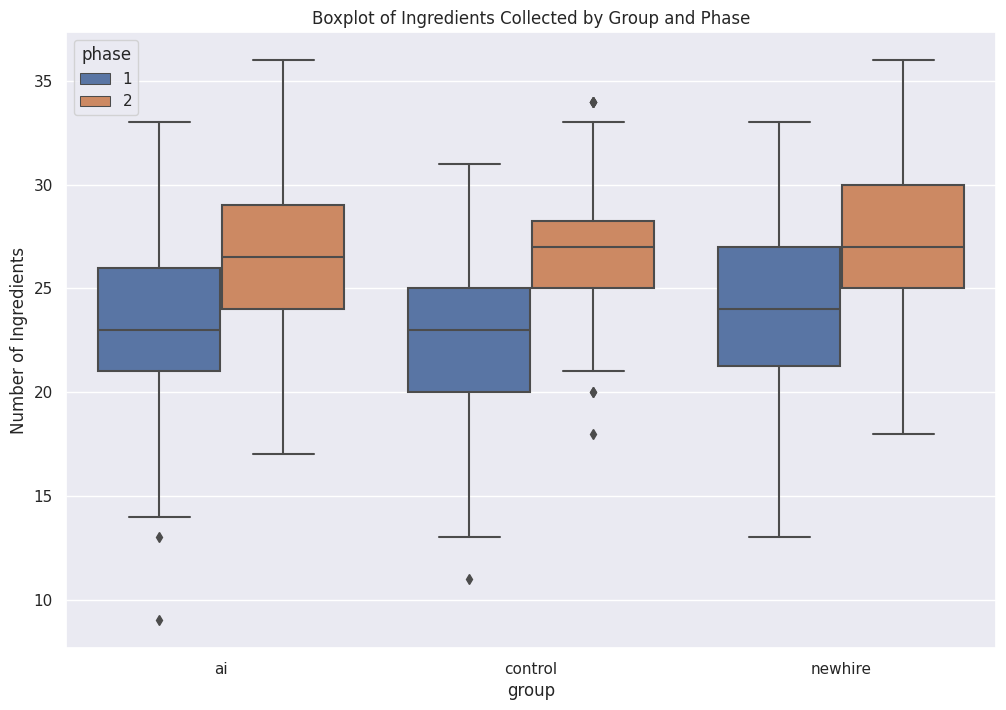

               count       mean       std   min    25%   50%    75%   max
group   phase                                                            
ai      1      120.0  23.125000  4.560633   9.0  21.00  23.0  26.00  33.0
        2      120.0  26.233333  3.379954  17.0  24.00  26.5  29.00  36.0
control 1      120.0  22.441667  4.250152  11.0  20.00  23.0  25.00  31.0
        2      120.0  26.750000  3.262339  18.0  25.00  27.0  28.25  34.0
newhire 1       90.0  23.444444  4.419342  13.0  21.25  24.0  27.00  33.0
        2       90.0  27.133333  3.892372  18.0  25.00  27.0  30.00  36.0


In [ ]:
# Python code for Descriptive Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
# Assuming 'data' is the name of your DataFrame
# Make sure your DataFrame has columns like 'Group', 'Phase', 'Ingredients'
# Group: control, newhire, ai
# Phase: 1, 2
#data = pd.read_csv("your_data.csv")

# Descriptive statistics
desc_stats = df.groupby(['group', 'phase'])['totalingred'].describe()

# Boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='group', y='totalingred', hue='phase', data=df)
ax.set(ylabel='Number of Ingredients')
plt.title('Boxplot of Ingredients Collected by Group and Phase')
plt.show()

# Summary statistics
print(desc_stats)


In [ ]:
phase2_control_df['totalingred'].sum() - phase1_control_df['totalingred'].sum()

517

In [ ]:
phase2_ai_df['totalingred'].sum() - phase1_ai_df['totalingred'].sum()

373

In [ ]:
phase2_newhire_df['totalingred'].sum() - phase1_newhire_df['totalingred'].sum()

332

In [ ]:
phase2_control_df['totalingred'].sum()

3210

[Text(0, 0.5, 'Number of Ingredients')]

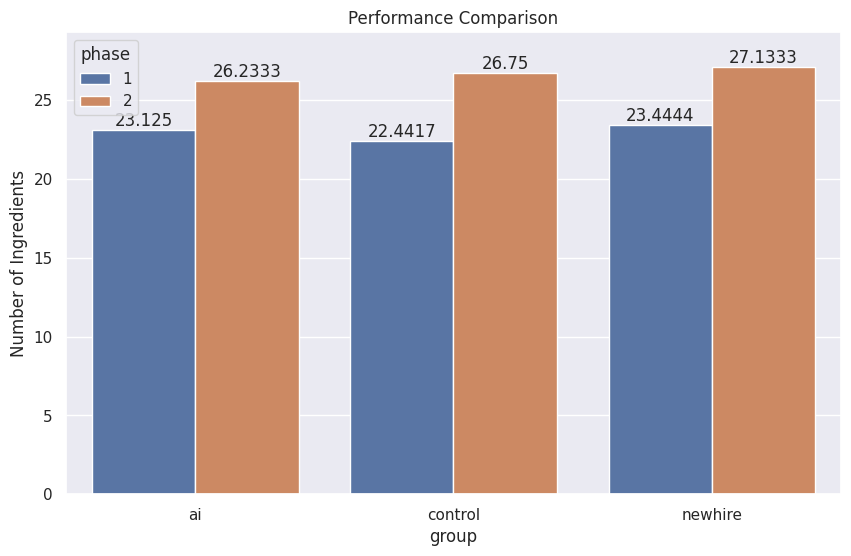

In [ ]:
plt.figure(figsize= (10,6))
plt.title('Performance Comparison')
ax = sns.barplot(df, x='group', y='totalingred', hue ='phase',
                 errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)
ax.set(ylabel='Number of Ingredients')

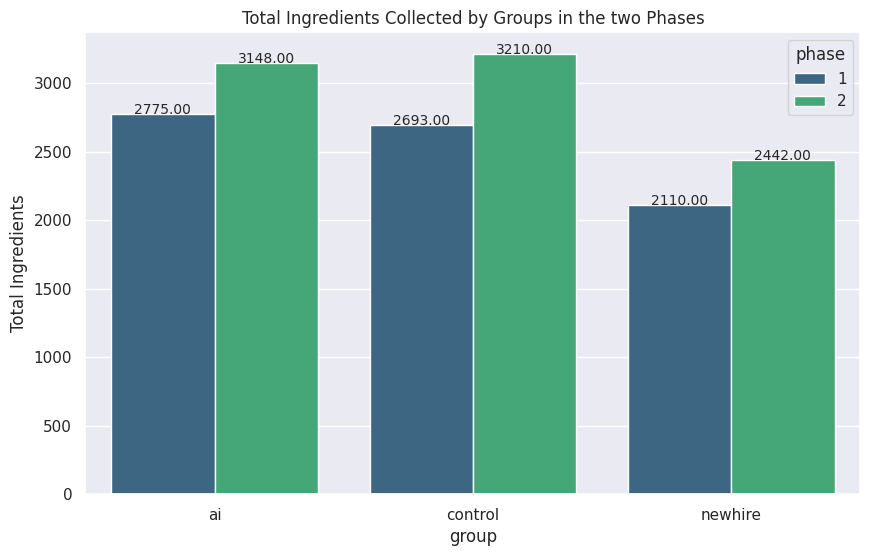

In [ ]:
total_ingredients = df.groupby(['group', 'phase'])['totalingred'].sum().reset_index()

# Create a new DataFrame to calculate the difference between phase 2 and phase 1
df_diff = total_ingredients.pivot(index='group', columns='phase', values='totalingred')
df_diff['total_difference'] = df_diff[2] - df_diff[1]

# Melt the DataFrame to prepare for visualization
df_diff_melted = df_diff.reset_index().melt(id_vars='group', var_name='phase', value_name='ingredient_difference')

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='group', y='ingredient_difference', hue='phase', data=df_diff_melted[df_diff_melted['phase'] != 'total_difference'], palette='viridis')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10)

ax.set(ylabel='Total Ingredients')
plt.title('Total Ingredients Collected by Groups in the two Phases')
plt.show()

In [ ]:
df_diff

phase,1,2,total_difference
group,,,
ai,2775,3148,373
control,2693,3210,517
newhire,2110,2442,332


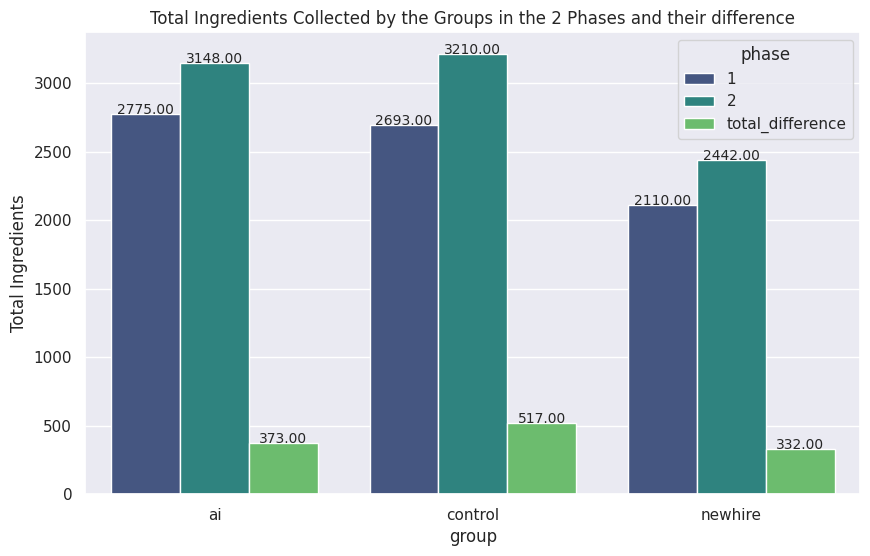

In [ ]:
total_ingredients = df.groupby(['group', 'phase'])['totalingred'].sum().reset_index()

# Create a new DataFrame to calculate the difference between phase 2 and phase 1
df_diff = total_ingredients.pivot(index='group', columns='phase', values='totalingred')
df_diff['total_difference'] = df_diff[2] - df_diff[1]

# Melt the DataFrame to prepare for visualization
df_diff_melted = df_diff.reset_index().melt(id_vars='group', var_name='phase', value_name='ingredient_difference')

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='group', y='ingredient_difference', hue='phase', data=df_diff_melted, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10)

ax.set(ylabel='Total Ingredients')
plt.title('Total Ingredients Collected by the Groups in the 2 Phases and their difference')
plt.show()